In [1]:
# Import all of the python packages used in this workflow.
import scipy
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt
import os, sys
from pylab import *
import pandas as pd
import numpy as np
import osr
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import FormatStrFormatter
import geopandas as gpd
from datetime import datetime
from datetime import timedelta  
import json

In [2]:
parFile = '/nfs/attic/dfh/Aragon2/mar2020_snowmodel-dfhill/snowmodel.par'
incFile = '/nfs/attic/dfh/Aragon2/mar2020_snowmodel-dfhill/code/snowmodel.inc'
compileFile = '/nfs/attic/dfh/Aragon2/mar2020_snowmodel-dfhill/code/compile_snowmodel.script'
ctlFile = '/nfs/attic/dfh/Aragon2/mar2020_snowmodel-dfhill/ctl_files/wo_assim/swed.ctl'
sweFile = '/nfs/attic/dfh/Aragon2/mar2020_snowmodel-dfhill/outputs/wo_assim/swed.gdat'
roffFile = '/nfs/attic/dfh/Aragon2/mar2020_snowmodel-dfhill/outputs/wo_assim/roff.gdat'
spreFile = '/nfs/attic/dfh/Aragon2/mar2020_snowmodel-dfhill/outputs/wo_assim/spre.gdat'
smltFile = '/nfs/attic/dfh/Aragon2/mar2020_snowmodel-dfhill/outputs/wo_assim/smlt.gdat'
precFile = '/nfs/attic/dfh/Aragon2/mar2020_snowmodel-dfhill/outputs/wo_assim/prec.gdat'
rpreFile = '/nfs/attic/dfh/Aragon2/mar2020_snowmodel-dfhill/outputs/wo_assim/rpre.gdat'
tairFile = '/nfs/attic/dfh/Aragon2/mar2020_snowmodel-dfhill/outputs/wo_assim/tair.gdat'
ssubFile = '/nfs/attic/dfh/Aragon2/mar2020_snowmodel-dfhill/outputs/wo_assim/ssub.gdat'
gdf = gpd.read_file('../CSO_SNOTEL_sites.geojson')
df = pd.read_csv('../CSO_SNOTEL_data_SWEDmeters.csv') 

In [3]:
## Build a function to convert the binary model output to numpy array

def get_mod_output_line(inFile,stn):
    #open the grads model output file, 'rb' indicates reading from binary file
    grads_data = open(inFile,'rb')
    # convert to a numpy array 
    numpy_data = np.fromfile(grads_data,dtype='float32',count=-1)
    #close grads file 
    grads_data.close()
    #reshape the data 
    numpy_data = np.reshape(numpy_data,(num_sim_days,ny,nx))
    #swe only at station point
    data = np.squeeze(numpy_data[:,0,stn]) 

    return data

In [4]:
def get_mod_dims():
    #get model data from .ctl file 
    f=open(ctlFile)
    lines=f.readlines()
    nx = int(lines[9].split()[1])
    xll = int(float(lines[9].split()[3]))
    clsz = int(float(lines[9].split()[4]))
    ny = int(lines[10].split()[1])
    yll = int(float(lines[10].split()[3]))
    num_sim_days = int(lines[14].split()[1])
    st = datetime.strptime(lines[14].split()[3][3:], '%d%b%Y').date()
    ed = st + timedelta(days=(num_sim_days-1))
    print('nx=',nx,'ny=',ny,'xll=',xll,'yll=',yll,'clsz=',clsz,'num_sim_days=',num_sim_days,'start',st,'end',ed)
    f.close()
    return nx, ny, xll, yll, clsz, num_sim_days, st, ed

nx, ny, xll, yll, clsz, num_sim_days, st, ed = get_mod_dims()

nx= 30 ny= 1 xll= 487200 yll= 4690100 clsz= 100 num_sim_days= 1825 start 2014-10-01 end 2019-09-29


# Plots

## Plot the full timeseries of multiple hydro variables 

* could add second axis for temp

0.6876807
993


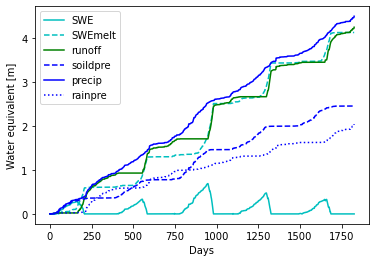

In [5]:
#DAVE
## Plot SnowModel outputs
#nx, ny, xll, yll, clsz, num_sim_days, st, ed = runSnowModel();
stn = 3 
SWE = get_mod_output_line(sweFile,stn)
mx_swe = np.max(SWE)
print(mx_swe)
swe_days = sum(SWE>0)
print(swe_days)
ROFF = get_mod_output_line(roffFile,stn)
SMLT = get_mod_output_line(smltFile,stn)
SPRE = get_mod_output_line(spreFile,stn)
PREC = get_mod_output_line(precFile,stn)
RPRE = get_mod_output_line(rpreFile,stn)
TAIR = get_mod_output_line(tairFile,stn)
#SSUB = get_mod_output_line(ssubFile,stn)

# Plot the result
plt.plot(SWE,'c-', label = 'SWE' )   # add observation series
plt.plot(SMLT, 'c--', label = 'SWEmelt' )   # add observation series
plt.plot(ROFF, color='green', label = 'runoff')   # add observation series
plt.plot(SPRE,'b--', label = 'soildpre')   # add observation series
plt.plot(PREC,'b-', label = 'precip')   # add observation series
plt.plot(RPRE,'b:', label = 'rainpre')   # add observation series
#plt.plot(SSUB,'grey',linestyle=':', label = 'sublimat')   # add observation series
plt.legend()
plt.xlabel( "Days")
plt.ylabel( "Water equivalent [m]")
plt.show()

## Plot hydro variables for each year

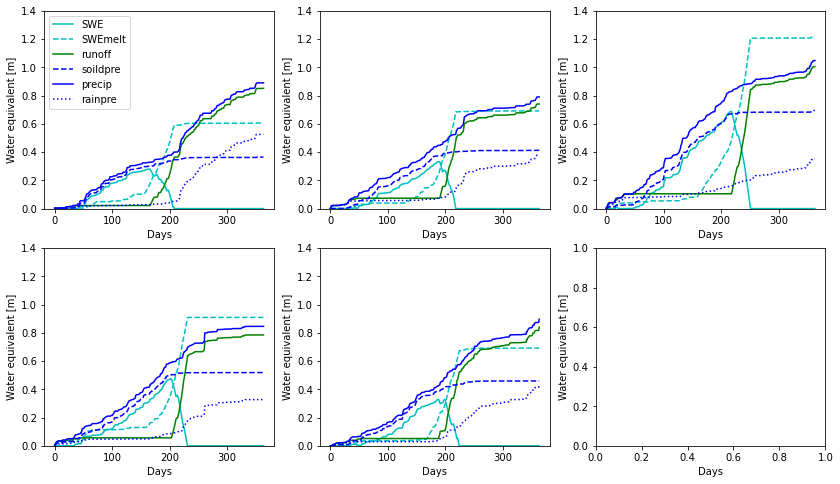

In [6]:
fig, axs = plt.subplots(2, 3,figsize=(14, 8))
#yr1
axs[0, 0].plot(SWE[0:364],'c-', label = 'SWE' )
axs[0, 0].plot(SMLT[0:364], 'c--', label = 'SWEmelt' )
axs[0, 0].plot(ROFF[0:364], color='green', label = 'runoff')
axs[0, 0].plot(SPRE[0:364],'b--', label = 'soildpre')
axs[0, 0].plot(PREC[0:364],'b-', label = 'precip')
axs[0, 0].plot(RPRE[0:364],'b:', label = 'rainpre')
#axs[0, 0].plot(SSUB[0:364],'grey',linestyle=':', label = 'sublimat')   
axs[0, 0].set_ylim([0,1.4])
axs[0, 0].legend()

#yr2
axs[0, 1].plot(SWE[365:729],'c-', label = 'SWE' )
axs[0, 1].plot(SMLT[365:729]-SMLT[364], 'c--', label = 'SWEmelt' )
axs[0, 1].plot(ROFF[365:729]-ROFF[364], color='green', label = 'runoff')
axs[0, 1].plot(SPRE[365:729]-SPRE[364],'b--', label = 'soildpre')
axs[0, 1].plot(PREC[365:729]-PREC[364],'b-', label = 'precip')
axs[0, 1].plot(RPRE[365:729]-RPRE[364],'b:', label = 'rainpre')
axs[0, 1].set_ylim([0,1.4])

#yr3
axs[0, 2].plot(SWE[730:1094],'c-', label = 'SWE' )
axs[0, 2].plot(SMLT[730:1094]-SMLT[729], 'c--', label = 'SWEmelt' )
axs[0, 2].plot(ROFF[730:1094]-ROFF[729], color='green', label = 'runoff')
axs[0, 2].plot(SPRE[730:1094]-SPRE[729],'b--', label = 'soildpre')
axs[0, 2].plot(PREC[730:1094]-PREC[729],'b-', label = 'precip')
axs[0, 2].plot(RPRE[730:1094]-RPRE[729],'b:', label = 'rainpre')
axs[0, 2].set_ylim([0,1.4])

#yr4
axs[1, 0].plot(SWE[1095:1459],'c-', label = 'SWE' )
axs[1, 0].plot(SMLT[1095:1459]-SMLT[1094], 'c--', label = 'SWEmelt' )
axs[1, 0].plot(ROFF[1095:1459]-ROFF[1094], color='green', label = 'runoff')
axs[1, 0].plot(SPRE[1095:1459]-SPRE[1094],'b--', label = 'soildpre')
axs[1, 0].plot(PREC[1095:1459]-PREC[1094],'b-', label = 'precip')
axs[1, 0].plot(RPRE[1095:1459]-RPRE[1094],'b:', label = 'rainpre')
axs[1, 0].set_ylim([0,1.4])

#yr5
axs[1, 1].plot(SWE[1460:1824],'c-', label = 'SWE' )
axs[1, 1].plot(SMLT[1460:1824]-SMLT[1459], 'c--', label = 'SWEmelt' )
axs[1, 1].plot(ROFF[1460:1824]-ROFF[1459], color='green', label = 'runoff')
axs[1, 1].plot(SPRE[1460:1824]-SPRE[1459],'b--', label = 'soildpre')
axs[1, 1].plot(PREC[1460:1824]-PREC[1459],'b-', label = 'precip')
axs[1, 1].plot(RPRE[1460:1824]-RPRE[1459],'b:', label = 'rainpre')
axs[1, 1].set_ylim([0,1.4])


for ax in axs.flat:
    ax.set(xlabel='Days', ylabel='Water equivalent [m]')

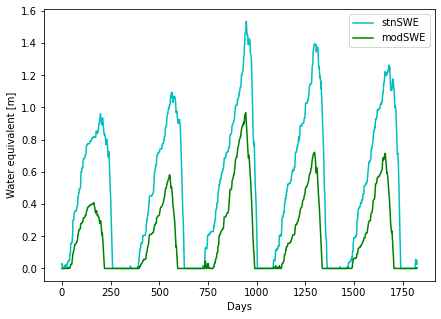

In [7]:
#DAVE
def calc_metrics1(stn):
    modSWE = get_mod_output_line(sweFile,stn)
    loc = gdf['code'][stn]
    stnSWE = df[loc].values
    return modSWE,stnSWE

modSWE,stnSWE = calc_metrics1(8)
# Plot the result
fig = plt.figure(figsize=(7, 5))
plt.plot(stnSWE,'c-', label = 'stnSWE' )  
plt.plot(modSWE,'g-', label = 'modSWE' ) 
plt.legend()
plt.xlabel( "Days")
plt.ylabel( "Water equivalent [m]")
plt.show()

# Function to make heatmap

In [8]:
#https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, vmin=-1, vmax=1, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts


In [9]:
data = xr.open_dataset('calibration_test1.nc')

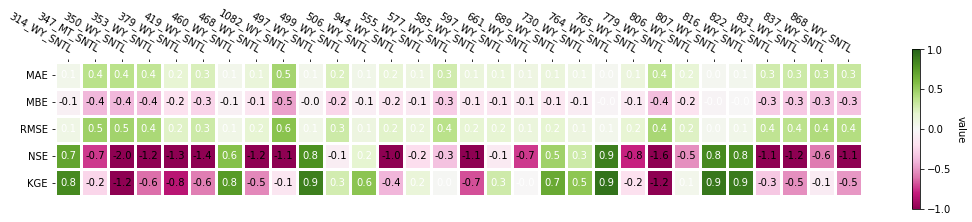

In [10]:
#DAVE
Metrics = ['MAE','MBE','RMSE','NSE','KGE']
Stations = gdf['code'].values


fig, ax = plt.subplots(figsize=(15, 3))
im, cbar = heatmap(data.cal_metrics[0,:,:], Metrics, Stations, ax=ax,
                   cmap="PiYG", cbarlabel="value")
texts = annotate_heatmap(im,valfmt="{x:.1f}")
fig.tight_layout()
plt.show()
